## Data Collection

In this phase we will collect the customer ratings data from the airline quality website called [Skytrax](https://www.airlinequality.com/airline-reviews/british-airways). We will collect data about airline ratings, seat ratings and lounge experience ratings from this website. 

In [88]:
#imports

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [89]:
#create an empty list to collect all reviews
reviews = []

#Create an empty list to collect dating stars
stars = []

#create an empty list to collect data
date = []

#create an empty list to collect country the reviewer is from
country = []


In [90]:
pip install html5lib


Note: you may need to restart the kernel to use updated packages.


In [91]:
import requests

In [92]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [93]:
reviews = []

#Create an empty list to collect dating stars
stars = []

#create an empty list to collect data
date = []

#create an empty list to collect country the reviewer is from
country = []

In [94]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize={100}")
    
    soup = BeautifulSoup(page.content, "html5")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 33
Error on page 34
Error on page 34


In [95]:
len(reviews)

3500

In [96]:
len(country)

3500

In [97]:
stars = stars[:3500]

In [98]:
df = pd.DataFrame({"reviews":reviews,"stars": stars,"date":date, "country":country})

In [99]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | While BA may have made some...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,23rd June 2024,Canada
1,✅ Trip Verified | British Airways new Club Sui...,3,23rd June 2024,Canada
2,"✅ Trip Verified | Four very pleasant, on time...",5,18th June 2024,United Kingdom
3,Not Verified | We travel extensively over 25...,9,18th June 2024,United Kingdom
4,✅ Trip Verified | Flight delayed an hour due ...,2,17th June 2024,United Kingdom


In [100]:
df.shape

(3500, 4)

### Export the data into csv format

In [101]:
import os 

cwd= os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

# DATA CLEANING

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

#regex
import re

In [103]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | While BA may have made some...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,23rd June 2024,Canada
1,✅ Trip Verified | British Airways new Club Sui...,3,23rd June 2024,Canada
2,"✅ Trip Verified | Four very pleasant, on time...",5,18th June 2024,United Kingdom
3,Not Verified | We travel extensively over 25...,9,18th June 2024,United Kingdom
4,✅ Trip Verified | Flight delayed an hour due ...,2,17th June 2024,United Kingdom


In [104]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [105]:
print(df.columns)


Index(['reviews', 'stars', 'date', 'country', 'verified'], dtype='object')


In [106]:
df['verified']

0        True
1        True
2        True
3       False
4        True
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

### Cleaning Reviews 
We will extract the column of reviews into a separate dataframe and clean it for semantic analysis

In [107]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [108]:
# add the corpus to the original dataframe

df['corpus'] = corpus

In [109]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | While BA may have made some...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,23rd June 2024,Canada,True,ba may made positive improvement club world pr...
1,✅ Trip Verified | British Airways new Club Sui...,3,23rd June 2024,Canada,True,british airway new club suite marked improveme...
2,"✅ Trip Verified | Four very pleasant, on time...",5,18th June 2024,United Kingdom,True,four pleasant time flight friendly helpful sta...
3,Not Verified | We travel extensively over 25...,9,18th June 2024,United Kingdom,False,verified travel extensively year tend use ba r...
4,✅ Trip Verified | Flight delayed an hour due ...,2,17th June 2024,United Kingdom,True,flight delayed hour due bad weather around jfk...


### Cleaning/Format date

In [110]:
df.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [111]:
# Function to remove ordinal suffixes
def remove_ordinal_suffix(date_str):
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

# Apply the function to the date column
df['date'] = df['date'].apply(remove_ordinal_suffix)

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d %B %Y')

print(df.dtypes)

reviews             object
stars               object
date        datetime64[ns]
country             object
verified              bool
corpus              object
dtype: object


In [112]:
df.date = pd.to_datetime(df.date)

In [113]:
df.date.head()

0   2024-06-23
1   2024-06-23
2   2024-06-18
3   2024-06-18
4   2024-06-17
Name: date, dtype: datetime64[ns]

### Cleaning ratings with stars

In [114]:
stars_column = df['stars']
print(stars_column)

0       \n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1                                   3
2                                   5
3                                   9
4                                   2
                    ...              
3495                                9
3496                                1
3497                                5
3498                                5
3499                               10
Name: stars, Length: 3500, dtype: object


In [115]:
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '3', '5', '9', '2', '8', '7', '1',
       '4', '6', '10', 'None'], dtype=object)

In [116]:
df.stars= df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [117]:
df.stars.value_counts()

stars
1       854
2       404
3       402
8       339
10      286
9       279
7       276
5       247
4       237
6       173
None      3
Name: count, dtype: int64

In [118]:
# drop the rows where the value of ratings is None
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [139]:
df.stars.unique()

array([ 5,  3,  9,  2,  8,  7,  1,  4,  6, 10])

# Check for null Values

In [120]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3497
Name: count, dtype: int64

In [121]:
df.country.isnull().value_counts()

country
False    3497
Name: count, dtype: int64

We have two missing values for country. For this we can just remove those two reviews (rows) from the dataframe

In [122]:
#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [123]:
df.shape

(3497, 6)

In [124]:
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | While BA may have made some...,5,2024-06-23,Canada,True,ba may made positive improvement club world pr...
1,✅ Trip Verified | British Airways new Club Sui...,3,2024-06-23,Canada,True,british airway new club suite marked improveme...
2,"✅ Trip Verified | Four very pleasant, on time...",5,2024-06-18,United Kingdom,True,four pleasant time flight friendly helpful sta...
3,Not Verified | We travel extensively over 25...,9,2024-06-18,United Kingdom,False,verified travel extensively year tend use ba r...
4,✅ Trip Verified | Flight delayed an hour due ...,2,2024-06-17,United Kingdom,True,flight delayed hour due bad weather around jfk...
...,...,...,...,...,...,...
3492,LGW to SZG. Absolutely useless for a scheduled...,9,2014-10-08,United Kingdom,False,lgw szg absolutely useless scheduled service w...
3493,BA92 4/10/14 YYZ-LHR B787 G-ZBJE. If you want ...,1,2014-10-08,United Kingdom,False,ba yyz lhr b g zbje want know ryanair long hau...
3494,Very comfortable return flight to Hannover in ...,5,2014-10-08,United Kingdom,False,comfortable return flight hannover club europe...
3495,Just took British from London to Seattle. Tire...,5,2014-10-08,United States,False,took british london seattle tired airplane fle...


In [125]:
df.to_csv(cwd + "/cleaned-BA-reviews.csv")

# Exploratory Data Analysis

In [332]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt


In [333]:
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the input are in order
df = df.reset_index(drop=True)

In [334]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | While BA may have made some...,5,2024-06-23,Canada,True,ba may made positive improvement club world pr...
1,✅ Trip Verified | British Airways new Club Sui...,3,2024-06-23,Canada,True,british airway new club suite marked improveme...
2,"✅ Trip Verified | Four very pleasant, on time...",5,2024-06-18,United Kingdom,True,four pleasant time flight friendly helpful sta...
3,Not Verified | We travel extensively over 25...,9,2024-06-18,United Kingdom,False,verified travel extensively year tend use ba r...
4,✅ Trip Verified | Flight delayed an hour due ...,2,2024-06-17,United Kingdom,True,flight delayed hour due bad weather around jfk...


### What is the overall rating given for british airways?

In [335]:
df.stars.mean()

4.605090077209036

### What is the total count for each rating?

Text(0.5, 0.98, 'Counts for each ratings')

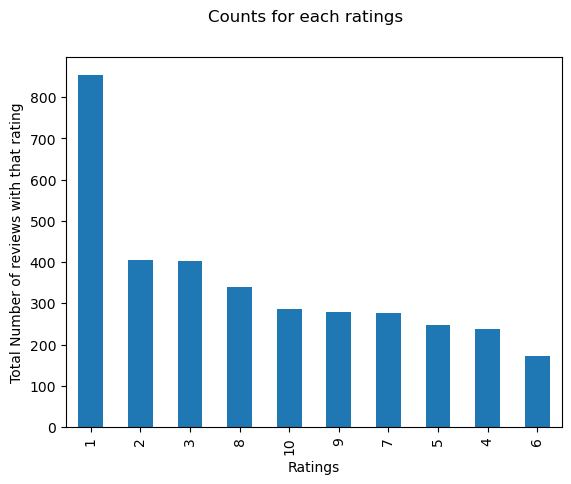

In [336]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [337]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | While BA may have made some...,5,2024-06-23,Canada,True,ba may made positive improvement club world pr...
1,✅ Trip Verified | British Airways new Club Sui...,3,2024-06-23,Canada,True,british airway new club suite marked improveme...
2,"✅ Trip Verified | Four very pleasant, on time...",5,2024-06-18,United Kingdom,True,four pleasant time flight friendly helpful sta...
3,Not Verified | We travel extensively over 25...,9,2024-06-18,United Kingdom,False,verified travel extensively year tend use ba r...
4,✅ Trip Verified | Flight delayed an hour due ...,2,2024-06-17,United Kingdom,True,flight delayed hour due bad weather around jfk...


In [338]:
df = df.dropna(subset=['stars'])

# Convert 'stars' to integer
df['stars'] = df['stars'].astype(int)

# Create a DataFrame from the value counts of the 'stars' column
df_ratings = pd.DataFrame(df['stars'].value_counts())

# Reset the index to turn the counts into a DataFrame
df_ratings = df_ratings.reset_index()

# Rename the columns
df_ratings.rename(columns={'total_counts': 'Stars', 'count': 'total_counts'}, inplace=True)


# Calculate the percentage values
df_ratings['pct_values'] = (df_ratings['total_counts'] / df_ratings['total_counts'].sum() * 100).round(2)


In [339]:
print(df_ratings)

   stars  total_counts  pct_values
0      1           854       24.42
1      2           404       11.55
2      3           402       11.50
3      8           339        9.69
4     10           286        8.18
5      9           279        7.98
6      7           276        7.89
7      5           247        7.06
8      4           237        6.78
9      6           173        4.95


In [340]:
import seaborn as sns
import matplotlib.pyplot

Text(0.5, 1.0, 'Counts for each ratings')

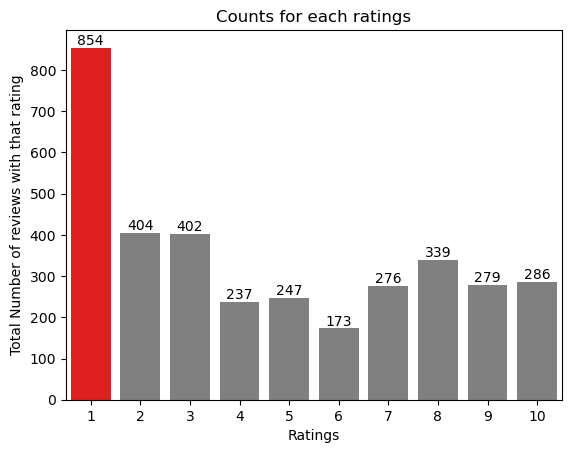

In [341]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [342]:
print(f"{len(df.country.unique())} unique countries")

71 unique countries


In [343]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

Text(0.5, 1.0, 'Maximum number of review by country')

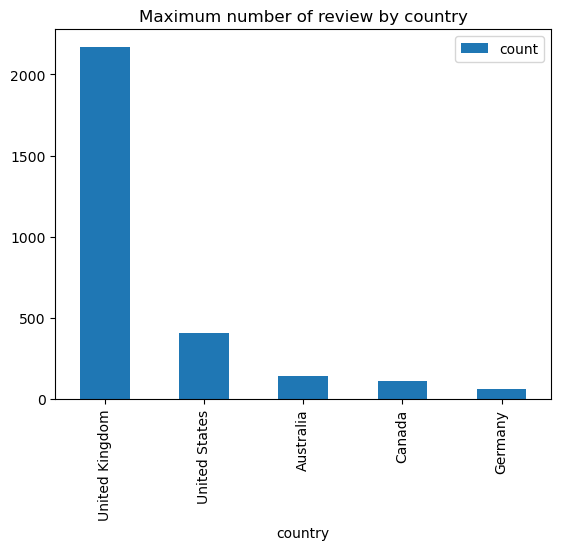

In [344]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

### Which country provided on average highest rartings

In [345]:
# Convert 'stars' to numeric, coercing errors
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Drop rows where 'stars' could not be converted to numeric
df = df.dropna(subset=['stars'])

In [346]:
df_country_rating = pd.DataFrame(df.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()


In [347]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

In [348]:
print(df_country_rating)


                  country  avg_rating
0      Dominican Republic   10.000000
1                 Ecuador    9.000000
2                Bulgaria    6.500000
3                 Denmark    6.461538
4                  Poland    6.125000
..                    ...         ...
65                 Jordan    1.000000
66  Saint Kitts and Nevis    1.000000
67                Bahrain    1.000000
68                 Panama    1.000000
69              Indonesia    1.000000

[70 rows x 2 columns]


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

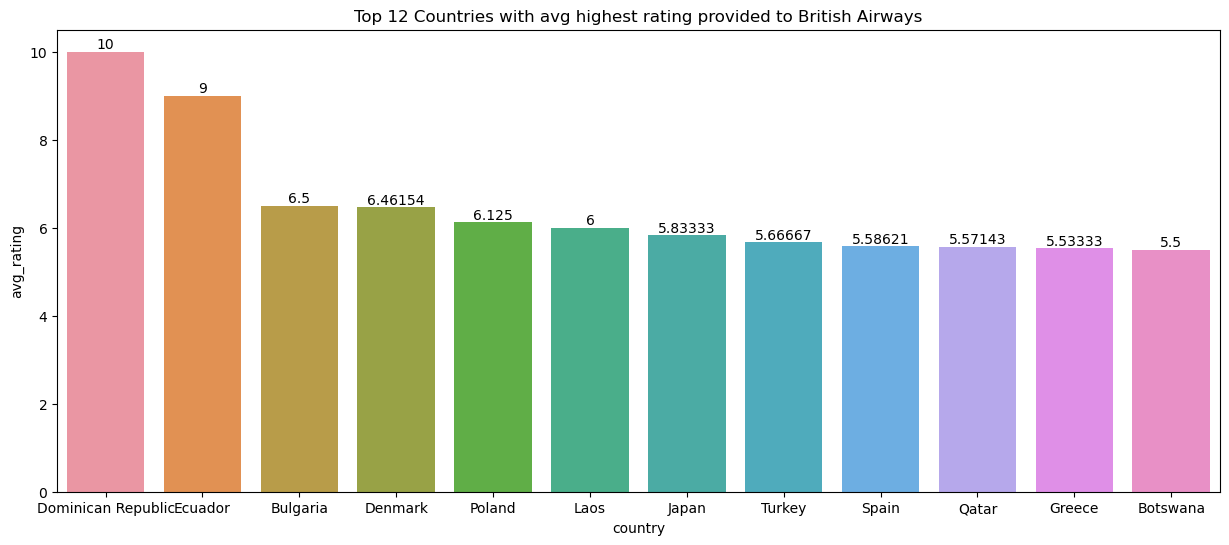

In [349]:
fig, ax = plt.subplots(figsize=(15,6))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [350]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [357]:
!pip install --upgrade plotly pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 976.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 1.0 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: plotly
    Found existing installation: plotly 5.9.0
    Uninstalling plotly-5.9.0:
      Successfully uninstalled plotly-5.9.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4


In [360]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [361]:
import plotly.express as px

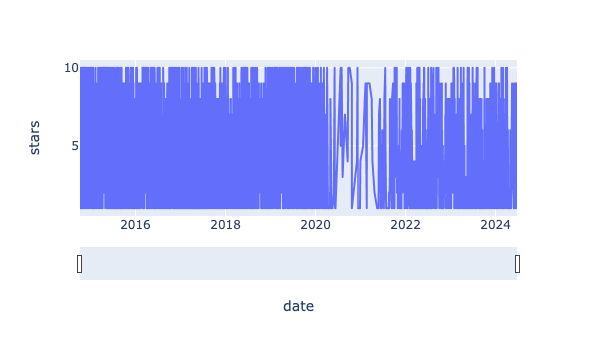

In [362]:
# Ensure your date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Create the line plot
fig = px.line(df, x='date', y='stars')

# Add a range slider to the x-axis
fig.update_xaxes(rangeslider_visible=True)

# Show the plot
fig.show()

It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot.



In [370]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 271.9 kB/s eta 0:00:00a 0:00:01


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vinayakpachauri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


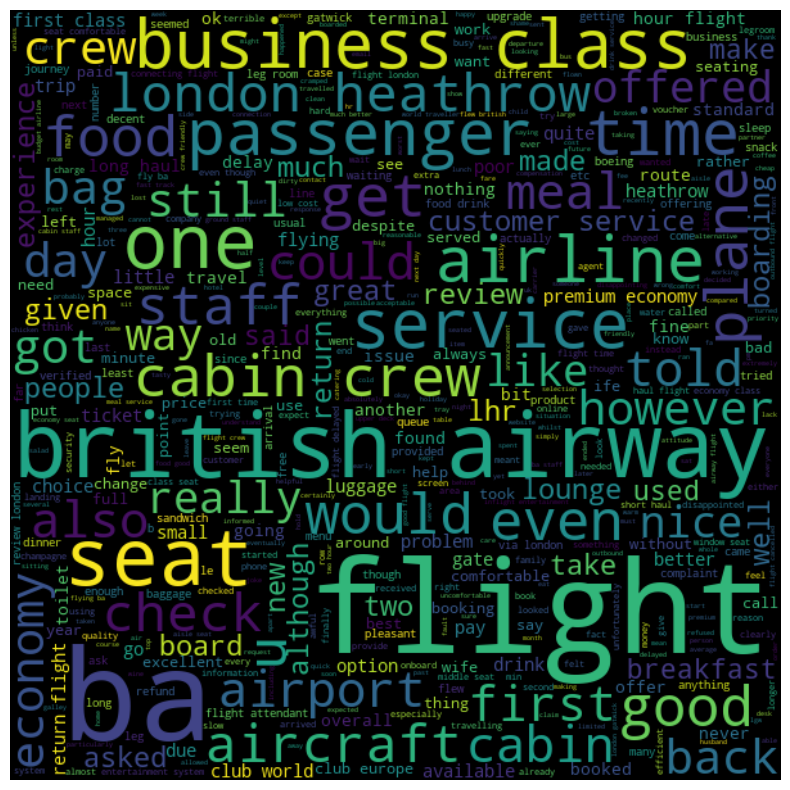

In [373]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Ensure you have downloaded the stopwords
nltk.download('stopwords')

# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

# Define stopwords
stop_words = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stop_words).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.



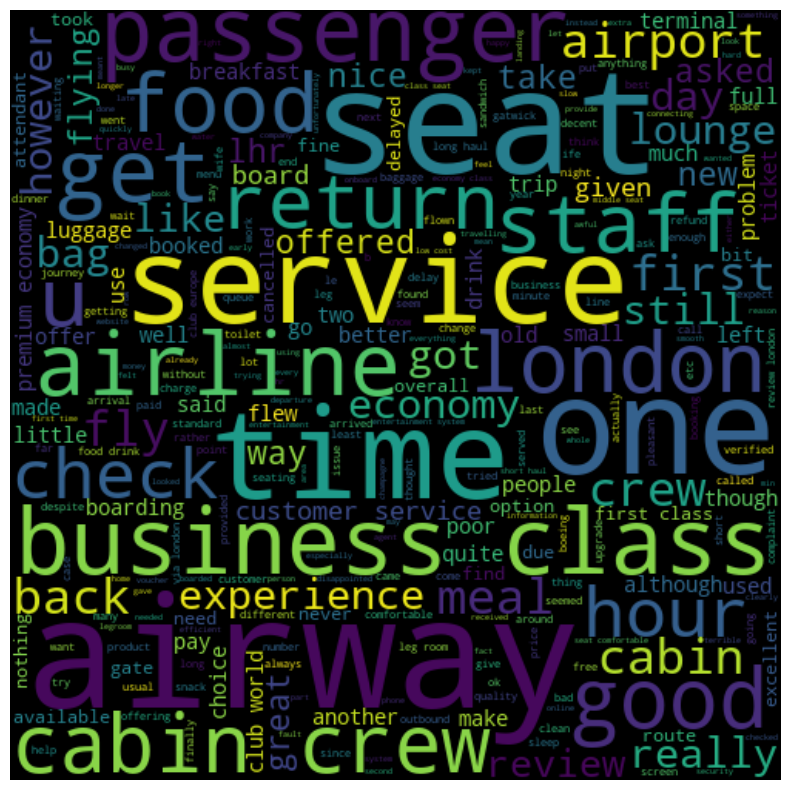

In [375]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))
stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight","british","airways","plane","told","also","passenger" \
                  "london","heathrow","aircraft","could","even","would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Frequency

In [381]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'cabin'),
  Text(6, 0, 'good'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'customer')])

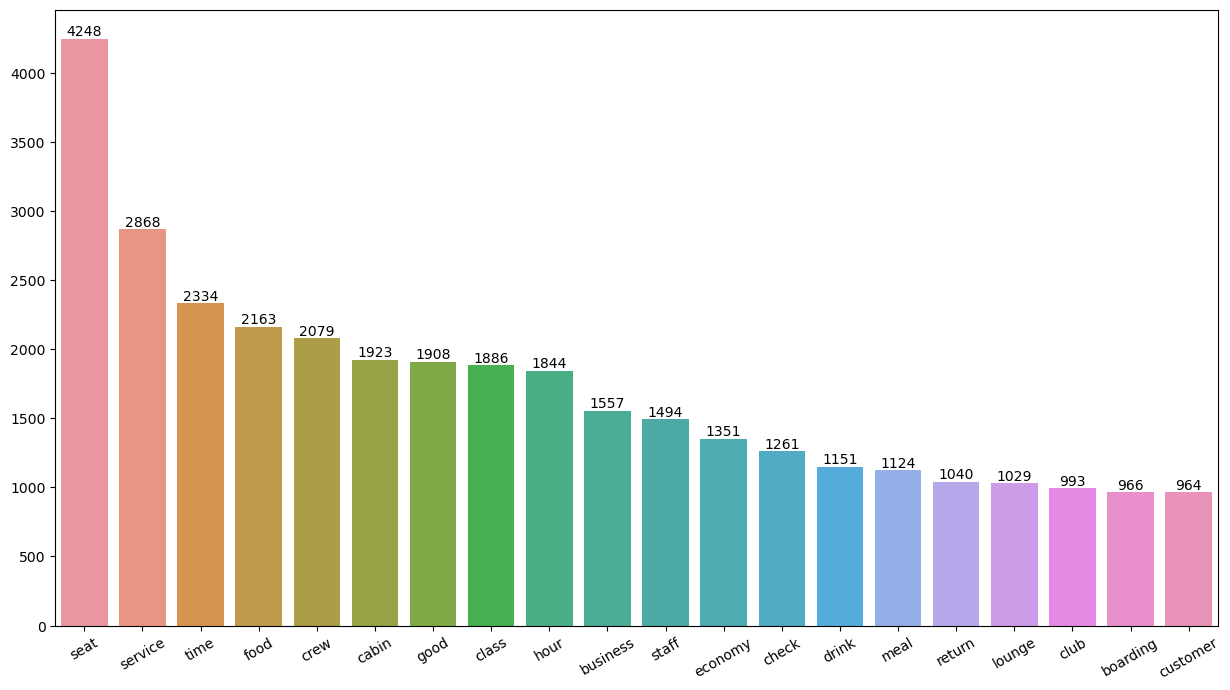

In [382]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)


This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service" and "food" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience.



<Axes: >

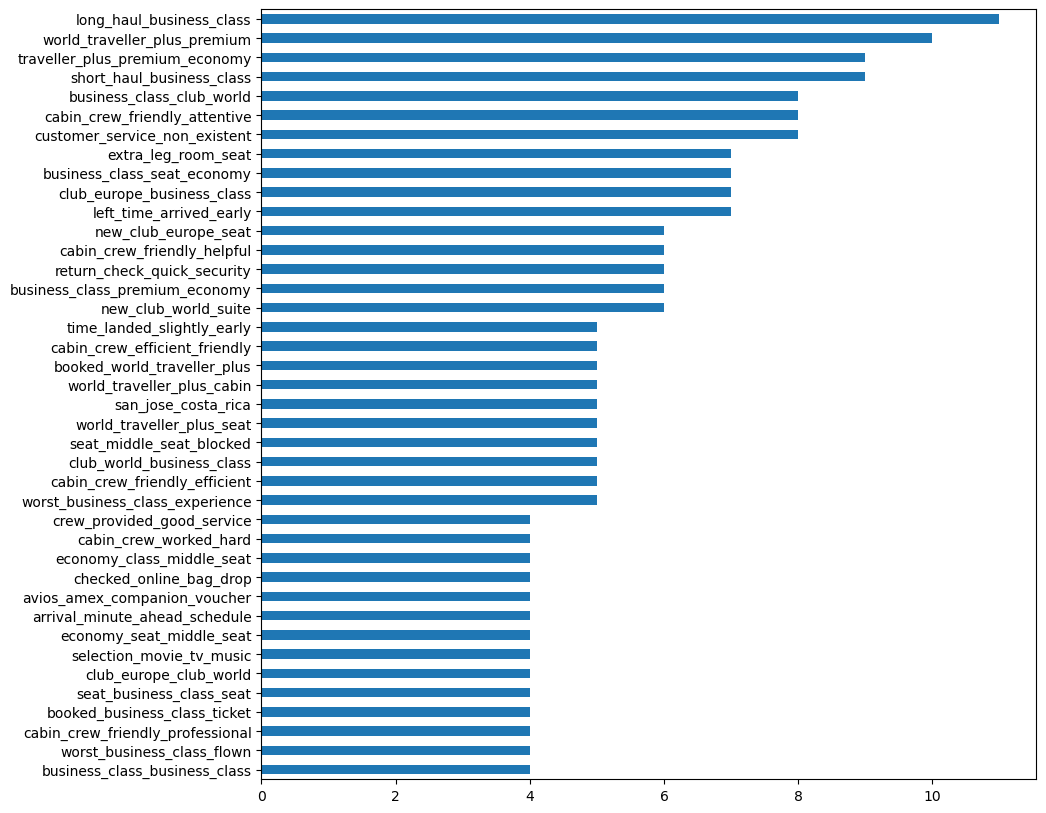

In [383]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.



However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.



In [384]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

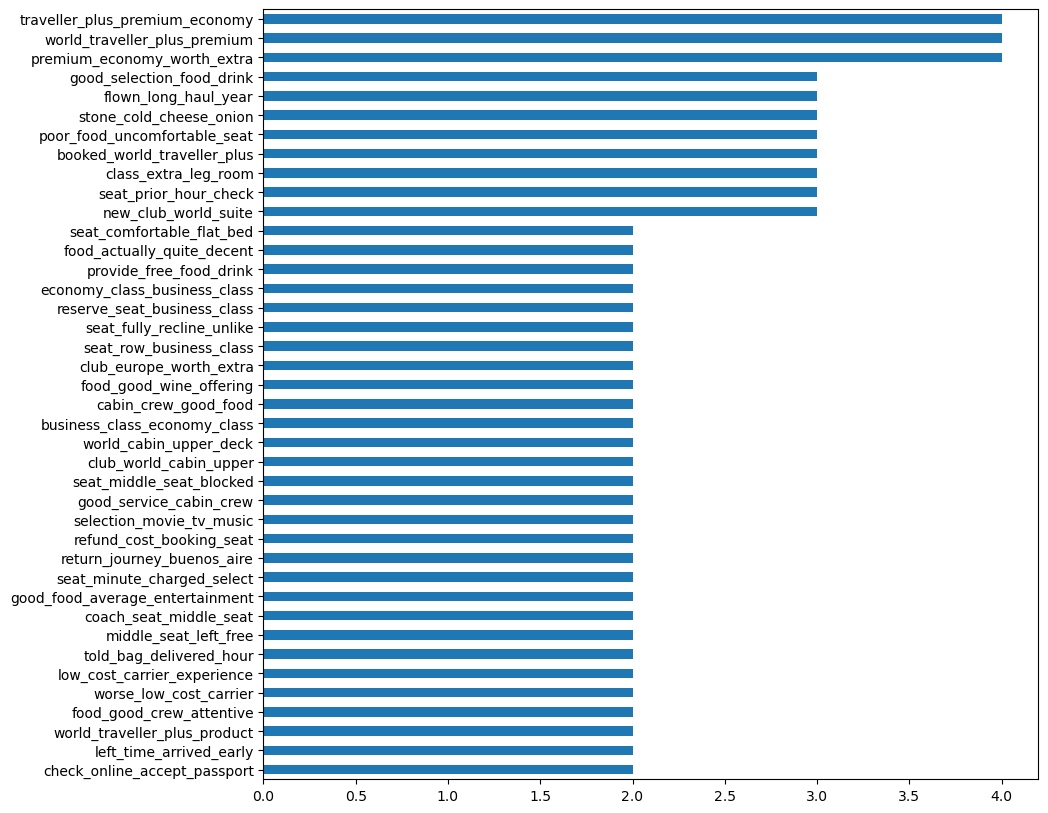

In [385]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

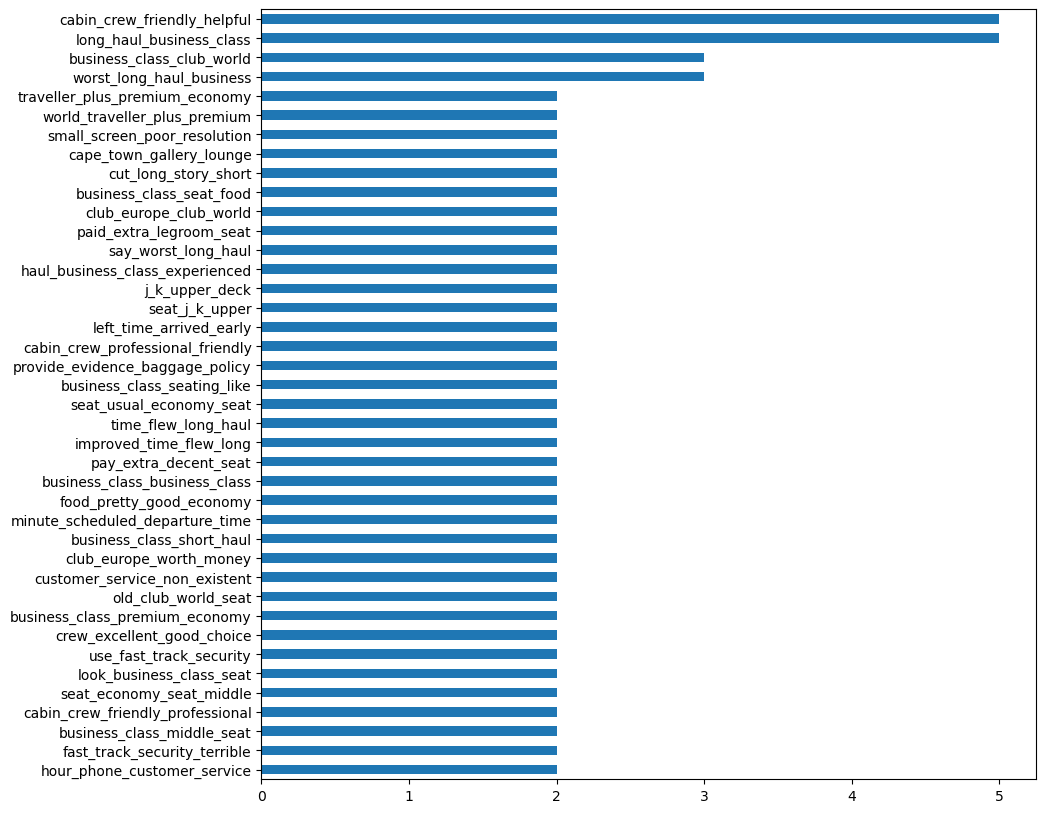

In [386]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

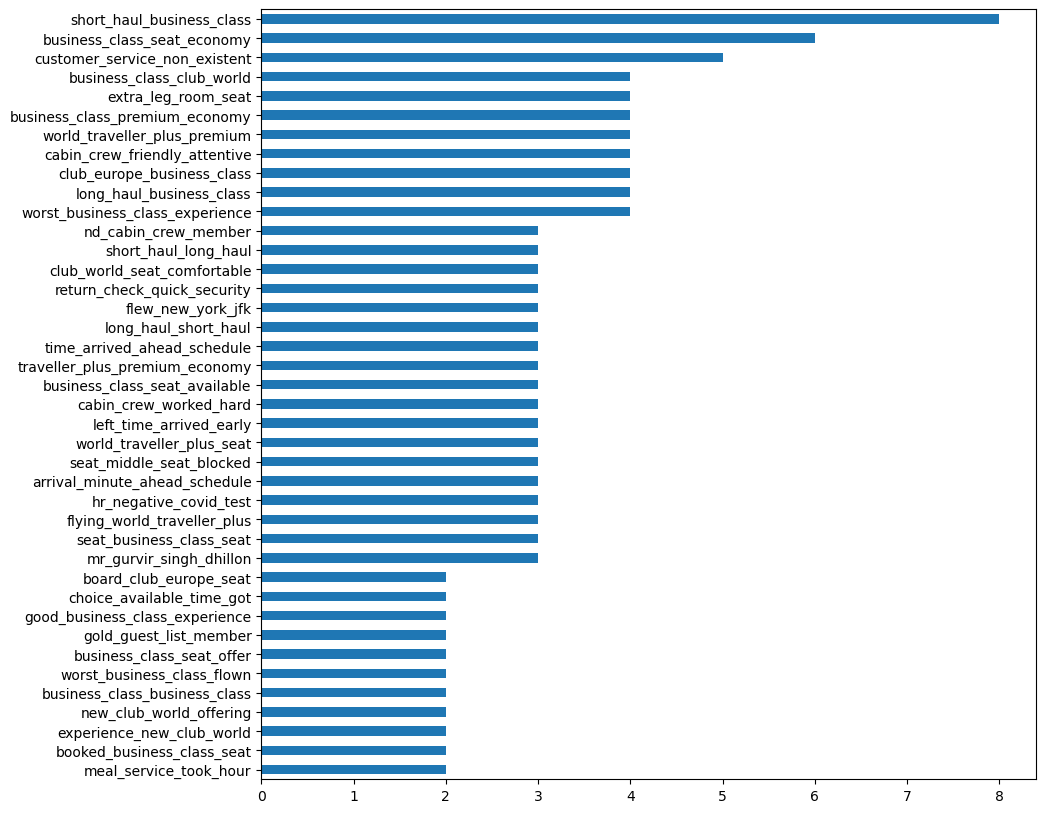

In [387]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [391]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 561.1 kB/s eta 0:00:00a 0:00:01


In [392]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity
                    

In [393]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2395 number of reviews between -0.2 and 0.2 polarity score
1396 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [395]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vinayakpachauri/nltk_data...


True

In [396]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0


In [397]:
df.label.value_counts()

label
 1    2194
-1    1182
 0     121
Name: count, dtype: int64

## Topic Modelling with LDA

We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.



In [404]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

# Create an object of CountVectorizer
vect = CountVectorizer()

# Apply transformation
tf = vect.fit_transform(df.corpus).toarray()

# Get feature names
tf_feature_names = vect.get_feature_names_out()


In [405]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [406]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,ba,135.5,bag,205.0,flight,1082.7,flight,1598.6,flight,2247.3,flight,2079.3,class,240.6,seat,1638.4
1,flight,51.7,luggage,188.4,ba,794.5,crew,1212.9,seat,1293.5,ba,787.8,airline,224.3,ba,913.1
2,st,49.3,airway,105.5,customer,632.6,good,1187.0,ba,1120.3,hour,738.1,business,198.6,class,886.0
3,seat,46.5,british,100.4,service,454.0,cabin,982.5,food,900.6,time,510.4,ba,191.3,business,874.4
4,one,38.5,day,73.8,told,436.9,service,981.2,british,891.2,check,495.5,airway,191.0,flight,479.5
5,two,37.8,baggage,58.8,would,408.8,seat,966.3,airway,878.2,london,469.6,british,182.7,economy,462.6
6,crew,37.0,suitcase,55.5,get,376.7,food,877.6,london,736.3,heathrow,451.7,seat,134.6,service,429.8
7,plane,36.5,london,51.9,airway,372.9,ba,841.9,service,655.6,minute,407.5,economy,131.8,passenger,309.2
8,boarding,32.9,lost,46.6,british,368.5,time,783.2,airline,640.5,airport,390.1,food,124.8,get,300.6
9,even,32.4,claim,40.7,day,368.2,lounge,760.8,cabin,602.9,delayed,388.7,london,108.5,airline,254.1


There are certain words that are not useful to detect the tone of the reviews overall like "britsh airways", "passenger", "flight", etc.



## Topic modelling with NMF

In [410]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.07678784, 0.06362031],
       [0.10212812, 0.05751404],
       [0.01410776, 0.06861323],
       ...,
       [0.00847237, 0.05449957],
       [0.0245657 , 0.0034218 ],
       [0.02754205, 0.0004409 ]])

In [411]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [412]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,seat,24.5,flight,21.2
1,ba,13.5,ba,7.4
2,class,11.1,hour,4.9
3,business,8.8,time,4.0
4,service,8.7,london,3.6
5,food,8.7,airway,3.5
6,cabin,8.3,british,3.5
7,crew,8.0,service,3.4
8,good,7.7,would,3.0
9,economy,6.7,day,2.7


With NMF algorithm as well we see there are few words that are not conclusive like "seat". So we will remove such words from the list and try topic modeling again.

